In [14]:
# Imports 
import os
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np

## Scraping naively page by page the models names and versions in huggingface 

In [ ]:
models = set()

for i in range(1,14900) :
  print("Iteration: ", i)

  url = f"hhttps://huggingface.co/models?pipeline_tag={feature_tag}&p={i}&sort=trending"

  response = requests.get(url)

  soup = BeautifulSoup(response.content.decode('utf8'))

  for model in soup.find_all('article'): 

    model_name = model.find('a').attrs['href'][1:]

    models.add(model_name)
  
  with open("./data/__bulk__.txt", "w") as file:
    for element in models:
      file.write(element + "\n")
  

print(models)

## Counting the number of models 

Total models: 200506
Total models with versions: 34420


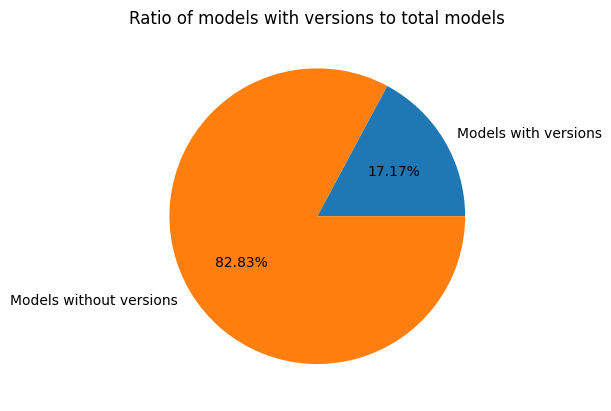

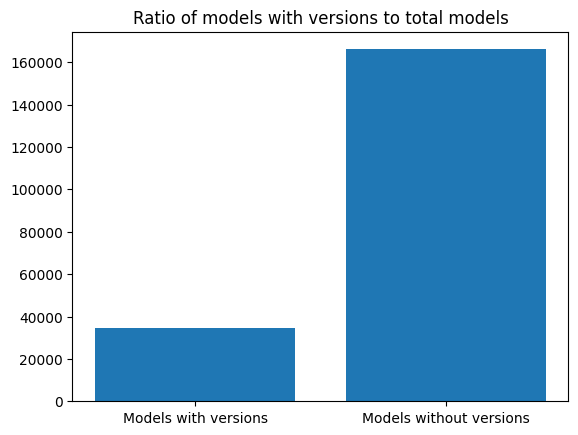

In [13]:

models = []

# Open the file in read mode
with open('./data/__bulk__.txt', 'r') as file:
    # Read all lines and store them in the 'modules' variable
    # Use strip() to remove any leading/trailing whitespace (including newlines)
    models = [line.strip() for line in file.readlines()]

# # Regular expression pattern to match various version formats (vX, vX.X, vX-X, vX.X.X, etc.)
pattern = r'[vV]\d'

# Define the regular expression pattern
# pattern = r'\b(small|tiny|large|base)\b'

# Counter for models with versions
models_with_versions = 0

# Iterate over the models and count those with versions
for model in models:
    if re.search(pattern, model):
        models_with_versions += 1


print(f"Total models: {len(models)}")
print(f"Total models with versions: {models_with_versions}")

# Calculate the ratio of models with versions to total models

ratio = models_with_versions / len(models)

labels = ['Models with versions', 'Models without versions']
values = [models_with_versions, len(models) - models_with_versions]

# Plot the pie chart
plt.pie(values, labels=labels, autopct='%.2f%%')
plt.title('Ratio of models with versions to total models')
plt.show()

# Plot the bar chart
plt.bar(labels, values)
plt.title('Ratio of models with versions to total models')
plt.show()


## Scraping models names and version per model category (tag type) in huggingface

In [ ]:

print("Scrapping model tags...");

pipeline_tags = [];
url = f"https://huggingface.co/models"
response = requests.get(url)
soup = BeautifulSoup(response.content.decode('utf8'))

for model in soup.find_all('a', class_='tag tag-white'):
  tag = model.attrs['href'][1:].split('=')[1]
  pipeline_tags.append(tag)

print("Model tags scrapped successfully, Total tags: ", len(pipeline_tags))

for model_tag in pipeline_tags:
  print("Scrapping models for tag: ", model_tag)

  url = f"https://huggingface.co/models?pipeline_tag={model_tag}&sort=trending"
  response = requests.get(url)
  soup = BeautifulSoup(response.content.decode('utf8'))
  models_count = soup.find('div', class_='ml-3 w-16 font-normal text-gray-400').text
  models_counted = 0;

  with open(model_tag+".txt", "w") as file:
    for model in soup.find_all('article'): 
      model_name = model.find('a').attrs['href'][1:]
      file.write(model_name + "\n")
      models_counted += 1

  index = 1

  while models_counted < int(models_count.replace(',', '').replace(' ', '').replace('.', ' ')):
    url = f"https://huggingface.co/models?pipeline_tag={model_tag}&p={index}&sort=trending"
    response = requests.get(url)
    soup = BeautifulSoup(response.content.decode('utf8'))

    with open(model_tag+".txt", "a") as file:
      for model in soup.find_all('article'): 
        model_name = model.find('a').attrs['href'][1:]
        file.write(model_name + "\n")
        models_counted += 1

    index += 1

## Global ratio of adoption of semantic versionning in the bulk scrape of huggingface

In [5]:
def count_lines_in_directory(directory):
    total_lines = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file == '__bulk__.txt':
                continue
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                total_lines += len(lines)
    return total_lines

directory = './data'
total_lines = count_lines_in_directory(directory)
print(f'Total lines: {total_lines}')


Total lines: 239091


## Making sure no duplicate entry exists in the sample under study

In [ ]:
directory = 'data'
exclude_file = '__bulk__.txt'
modules_names_entries = set()
files_count = 0

for filename in os.listdir(directory):
    if filename != exclude_file:
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            files_count += 1
            print(f'Checking {filename}...')
            for line in file:
                if line in modules_names_entries:
                    # Do something with the repeated line
                    # For example, you can add it to a list or print it
                    print(f'Repeated line in {filename}: {line}')
                else:
                    modules_names_entries.add(line)

print(f'Number of files checked: {files_count}')
print(f'Number of lines checked: {len(modules_names_entries)}')

## Extracting adoption ratios : Globally (again) and per Category too

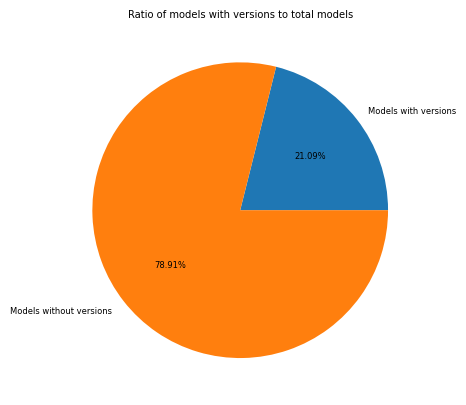

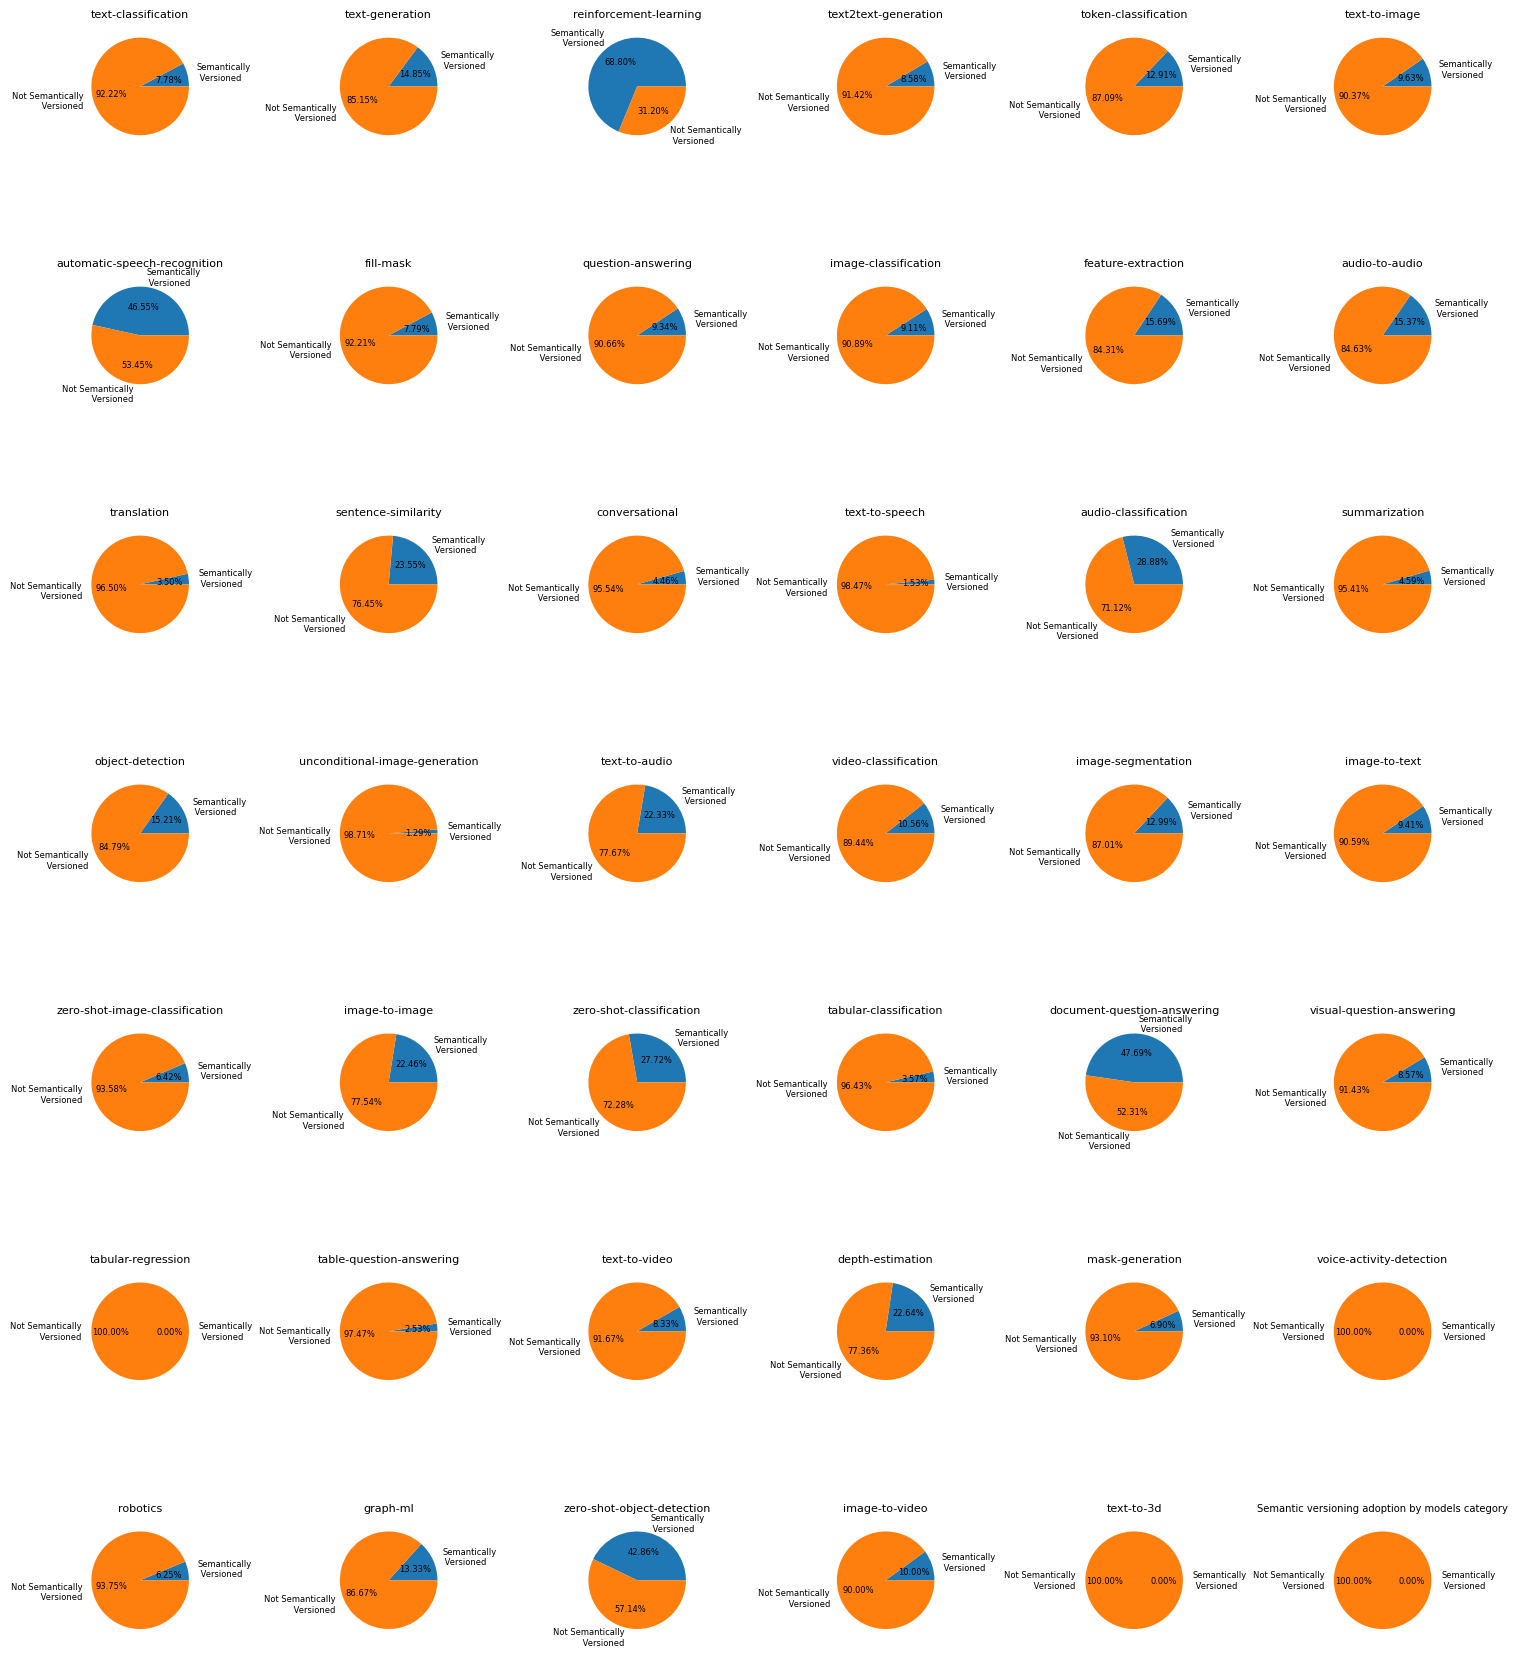

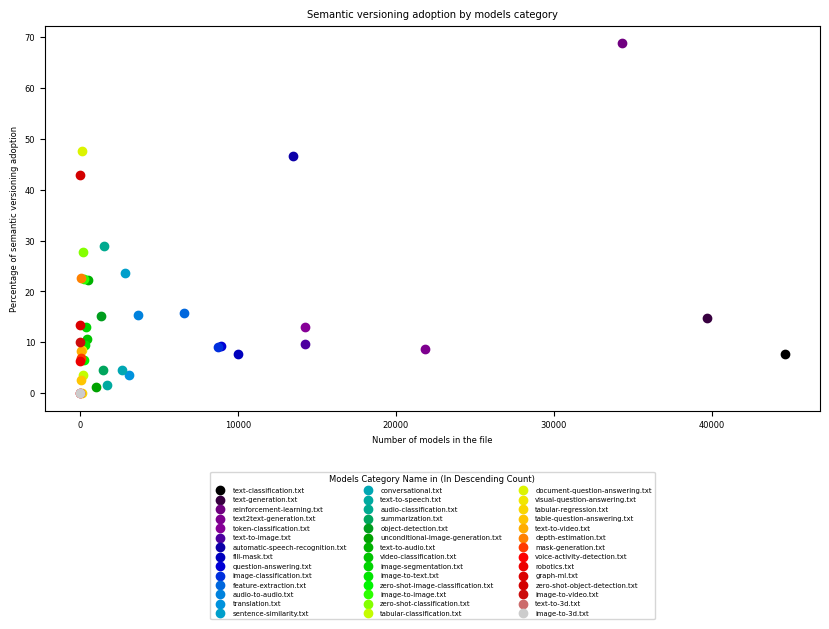

In [17]:
# Define the semantic versioning regex pattern
version_regex = r"[vV]\d[.-]?\d?[.-]?\d?"

# Initialize counters
file_count = 0
version_count = 0

# Initialize a dictionary to store the version counts by file name
version_counts_by_file = {}
models_countn_by_file = {}

# Iterate through the files in the directory
for filename in os.listdir('./data'):
    if filename != "__bulk__.txt" and filename.endswith(".txt"):
        file_count += 1
        version_counts_by_file[filename] = 0
        models_countn_by_file[filename] = 0

        # Open the file and iterate through each line
        with open(os.path.join('./data', filename), 'r') as file:
            for line in file:
                # Check if the line contains a semantic versioning string
                models_countn_by_file[filename] += 1
                if re.search(version_regex, line):
                    version_count += 1
                    version_counts_by_file[filename] += 1

# Global version adoption ratio
number_of_models = sum([models_countn_by_file[key] for key in models_countn_by_file.keys()])
number_of_models_with_versions = sum([version_counts_by_file[key] for key in version_counts_by_file.keys()])

plt.pie([number_of_models_with_versions, number_of_models - number_of_models_with_versions], labels=['Models with versions', 'Models without versions'], autopct='%.2f%%')
plt.title('Ratio of models with versions to total models')
plt.show()

# Reorder the dictionary by value count (descending)
models_countn_by_file = dict(sorted(models_countn_by_file.items(), key=lambda item: item[1], reverse=True))
# Reorder by order of keys in the models_countn_by_file dictionary
version_counts_by_file = {key: version_counts_by_file[key] for key in models_countn_by_file.keys()}

# Calculate the number of subplots needed (one for each file)
num_files = len(version_counts_by_file)

# Calculate the number of rows needed
num_rows = num_files // 6
if num_files % 6:
    num_rows += 1

# Create a figure
fig = plt.figure(figsize=(15, num_rows*2.5))

# Iterate over the dictionary and create a pie chart for each file
for i, (filename, version_count) in enumerate(version_counts_by_file.items()):
    # Calculate the row and column indices
    row = i // 6
    col = i % 6

    # Create a subplot
    ax = plt.subplot2grid((num_rows, 6), (row, col))

    # Calculate the number of models in the file
    num_models = models_countn_by_file[filename]
    
    # Calculate the number of models without versions
    num_models_without_versions = num_models - version_count

    # Create a pie chart
    ax.pie([version_count, num_models_without_versions], labels=['Semantically\n Versioned', 'Not Semantically\n Versioned'], autopct='%.2f%%', textprops={'fontsize': 6}, labeldistance=1.2)
    ax.set_title(filename.replace('.txt', ''), fontsize=8)


# Set the font size for labels and title
plt.rcParams.update({'font.size': 6})

# Display the figure
plt.tight_layout()
plt.title('Semantic versioning adoption by models category')
plt.show()

# Create a colormap and select 42 distinct colors from it
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 42))

# Create a new figure with a smaller size
plt.figure(figsize=(10, 5))

# Iterate over the dictionary and plot each point with a different color
for i, (filename, version_count) in enumerate(version_counts_by_file.items()):
    # Calculate the number of models in the file
    num_models = models_countn_by_file[filename]
    
    # Calculate the percentage of semantic versioning adoption
    versioning_adoption = version_count / num_models * 100

    # Plot the point with a different color
    plt.scatter(num_models, versioning_adoption, color=colors[i], label=filename)

# Set the labels for the x and y axes
plt.xlabel('Number of models in the file')
plt.ylabel('Percentage of semantic versioning adoption')

# Display a legend under the plot area
legend = plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='small', ncol=3)

# Set the title of the legend
legend.set_title("Models Category Name in (In Descending Count)")

# Save the figure with a smaller size
plt.title('Semantic versioning adoption by models category')
plt.show()

Sorted counts: {'text-classification.txt': 44617, 'text-generation.txt': 39676, 'reinforcement-learning.txt': 34296, 'text2text-generation.txt': 21816, 'token-classification.txt': 14262, 'text-to-image.txt': 14212, 'automatic-speech-recognition.txt': 13469, 'fill-mask.txt': 10029, 'question-answering.txt': 8950, 'image-classification.txt': 8701, 'feature-extraction.txt': 6576, 'audio-to-audio.txt': 3644, 'translation.txt': 3082, 'sentence-similarity.txt': 2866, 'conversational.txt': 2671, 'text-to-speech.txt': 1700, 'audio-classification.txt': 1513, 'summarization.txt': 1461, 'object-detection.txt': 1328, 'unconditional-image-generation.txt': 1010, 'text-to-audio.txt': 497, 'video-classification.txt': 464, 'image-segmentation.txt': 385, 'image-to-text.txt': 340, 'zero-shot-image-classification.txt': 265, 'image-to-image.txt': 236, 'zero-shot-classification.txt': 202, 'tabular-classification.txt': 168, 'document-question-answering.txt': 130, 'visual-question-answering.txt': 105, 'tabula

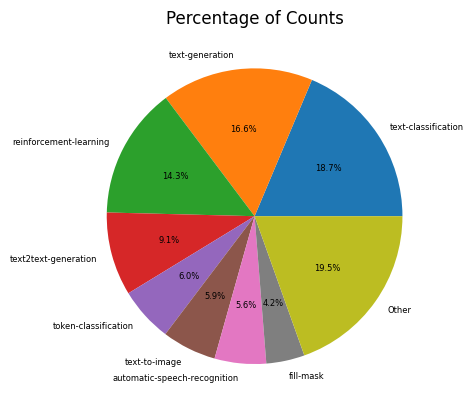

In [13]:
import os
import matplotlib.pyplot as plt

# Define the directory path
directory = './data'

# Initialize a dictionary to store the counts
counts = {}

# Initialize the global count variable
global_count = 0

# Iterate through the files in the directory
for filename in os.listdir(directory):
    # Exclude the "__bulk__.txt" file
    if filename != "__bulk__.txt":
        # Open the file and count the number of lines
        with open(os.path.join(directory, filename), 'r') as file:
            count = sum(1 for line in file)
        
        # Add the count to the dictionary
        counts[filename] = count
        
        # Update the global count
        global_count += count

# Sort the counts dictionary by value in descending order
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

# Calculate the threshold value
threshold = global_count * 0.8

print(f"Sorted counts: {sorted_counts}")

# Initialize lists to store the labels and values for the pie chart
labels = []
values = []

# Iterate through the sorted counts and add the labels and values to the lists
other_count = 0
for filename, count in sorted_counts.items():
    if other_count <= threshold:
        labels.append(filename.replace('.txt',''))
        values.append(count)
        other_count += count
    else:
        labels.append("Other")
        values.append(global_count - other_count)
        break

# Plot the pie chart
plt.pie(values, labels=labels, autopct='%.1f%%', textprops={'fontsize': 6})
plt.title('Percentage of Counts')
plt.show()


## Is there a varying pattern from one category to another which is followed ? 
The previous results show that,globally, there is no semantic version control. However given that 21% of the models contain a semantic version, which is an important number : 39k, we were enticed to dig deeper and see if its spread out accross different model categories or whether there are specific categories that follow semantic versionning. 
Our hunch was correct. As the dataset is made up of 42 categories, with some being more voluminous than the other, a couple heavy datasets stood out, while the rest was mostly at an adoption rate below 20%.
Indeed the "Reinforcement Learning" and "Automatic Speech Recognition" categories have an important adoption rate of semantic versionning. 
Could it be that this way of versionning models is not well suited for other categorise and a differnt semantic versionning model is adopted ? 

To check this hypothesis, we are going to manually dig out patterns (if present) from the models names in the biggest datasets which make up 80% of the total (parito law in place ;)), and then rely on our scripts to validate the adoption of the extracted patterns.

We will not take into consideration the models in "Reinforcement Learning" and "Automatic Speech Recognition", as these categories have a globally established semantic versionning pattern.

This leaves with this list of tasks categories : 
- text classifcation
- text generation
- text to text generation
- token classification
- text to image
- fill-mask

Manually these patterns were found : 
- text generation : \d[.-]?\d?bpw[.-]?[h|hB]?\d?[.-]?(exl)?\d?[.-]?\d? , GPTQ, AWQ, GGUF, GGUML



In [24]:
import collections
import re 
# Re-reading the file and tokenizing the model names
with open('./data/text-generation.txt', 'r') as file:
    model_names = [line.split('/')[1].strip() for line in file if '/' in line]

# Tokenizing the suffixes using "." and "-" as separators
tokenized_suffixes = [re.split(r'[-\.]', name) for name in model_names if '-' in name or '.' in name]

tokenized_suffixes = [token for suffix in tokenized_suffixes for token in suffix]

# Counting the occurrence of individual tokens and combinations of tokens
token_counts = collections.Counter(tokenized_suffixes)
combination_counts = collections.Counter()

for name in model_names:
    tokens = re.split(r'[-\.]', name)
    if len(tokens) > 1:
        for i in range(len(tokens) - 1, 0, -1):
            combination = '.'.join(tokens[i:]) if '.' in tokens[i] else '-'.join(tokens[i:])
            combination_counts[combination] += 1

# Most common individual tokens and combinations
most_common_tokens = token_counts.most_common(10)
most_common_combinations = combination_counts.most_common(10)

most_common_tokens, most_common_combinations

([('7b', 5741),
  ('2', 5660),
  ('llama', 3060),
  ('1', 2628),
  ('7B', 2395),
  ('gpt2', 1887),
  ('13b', 1822),
  ('exl2', 1665),
  ('chat', 1586),
  ('13B', 1491)],
 [('exl2', 1388),
  ('GPTQ', 1329),
  ('AWQ', 962),
  ('h6-exl2', 911),
  ('0bpw-h6-exl2', 731),
  ('7b', 697),
  ('2', 654),
  ('1', 603),
  ('GGUF', 526),
  ('v2', 450)])

In [47]:
import re
import collections

# Read the file and tokenize the model names
with open('./data/text-generation.txt', 'r') as file:
    model_names = [line.strip() for line in file]

# Extract the name part from each model name if it exists
name_parts = [name.split('/')[1].split('-')[0].split('.')[0] for name in model_names if '/' in name]

# Find the name parts that are repeated in the file
repeated_name_parts = [name_part for name_part, count in collections.Counter(name_parts).items() if count > 1]

# Filter the model names to keep only the ones with repeated name parts
filtered_model_names = [name for name in model_names if '/' in name and name.split('/')[1].split('-')[0].split('.')[0] in repeated_name_parts]

# Tokenize the version part using "-" and "." as delimiters
tokenized_versions = [re.split(r'[-\.]', name.split('/')[1].split('-')[1]) for name in filtered_model_names if '/' in name and '-' in name.split('/')[1] ]

# Extract all the tokens
tokens = [token for version in tokenized_versions for token in version]

# Combine the tokens in different ways using "-" and "."
combinations = []
for i in range(1, 5):
    combinations.extend(['-'.join(tokens[j:j+i]) for j in range(len(tokens)-i+1)])
    combinations.extend(['.'.join(tokens[j:j+i]) for j in range(len(tokens)-i+1)])

# Count the occurrence of individual tokens and combinations
token_counts = collections.Counter(tokens)
combination_counts = collections.Counter(combinations)

# Find the top tokens and combinations
top_tokens = token_counts.most_common(10)
top_combinations = combination_counts.most_common(10)

# Group the model names by the repeated name parts
grouped_model_names = collections.defaultdict(list)
for name in filtered_model_names:
    if '-' in name.split('/')[1] :
        name_part = name.split('/')[1].split('-')[0].split('.')[0]
        grouped_model_names[name_part].append(name.split('/')[1].split('-')[1])

# Find the repeated patterns of versioning
repeated_patterns = []
for name_part, versions in grouped_model_names.items():
    version_counts = collections.Counter(versions)
    for version, count in version_counts.items():
        if count > 1:
            repeated_patterns.append((name_part, version, count))

# Sort the repeated patterns by count in descending order
repeated_patterns.sort(key=lambda x: x[2], reverse=True)

# Display the top repeated patterns of versioning
top_repeated_patterns = repeated_patterns[:10]
top_repeated_patterns


[('llama', '2', 1853),
 ('Llama', '2', 1033),
 ('Mistral', '7B', 388),
 ('distilgpt2', 'finetuned', 369),
 ('falcon', '7b', 193),
 ('mistral', '7b', 190),
 ('llama2', '7b', 185),
 ('gpt', 'neo', 184),
 ('my_awesome_eli5_clm', 'model', 157),
 ('codeparrot', 'ds', 152)]

In [85]:
import re
import collections
from itertools import combinations

# Read the file and tokenize the model names
with open('./data/text-generation.txt', 'r') as file:
    models = [line.split('/')[1].strip() for line in file if '/' in line]

# models with versions
models = [model for model in models if '-' or '.' in model]

# model names
models_names = [model.split('-')[0].split('.')[0] for model in models]

# models names with multiple versions
multi_versions_models_names = [name_part for name_part, count in collections.Counter(models_names).items() if count > 1]

# models with multiple versions
multi_versions_models = [model for model in models if model.split('-')[0].split('.')[0] in multi_versions_models_names]

multi_versions_models_dict = {}

for model in multi_versions_models:
    model_name = model.split('-')[0].split('.')[0]
    version = "-".join(model.split('-')[1:]) if model.split('-')[0] in multi_versions_models_names else ".".join(model.split('.')[1:]) 
    version = re.sub(r'-?[vV]\d\.?\d?\.?\d?', '', version) 
    version = re.split(r'-', version) 
    version = [re.split(r'\.', version) if re.search(r'\d\.\d',version) is None else [version] for version in version]
    version = [[version for version in versions if version != ''] for versions in version]
    version = [token for version in version for token in version]
    version = [token for token in version if not token.isdigit()]
    version = [token for token in version if len(token) > 1]
    for token in version:
        if model_name in multi_versions_models_dict:
            existing_tokens = multi_versions_models_dict[model_name]
            if token not in existing_tokens:
                multi_versions_models_dict[model_name].append(token)
        else:
            multi_versions_models_dict[model_name] = [token]
            
tokens = [token for model, versions in multi_versions_models_dict.items() for token in versions]

# Count the occurrence of individual tokens and combinations
token_counts = collections.Counter(tokens)

# Find the top tokens and combinations
top_tokens = token_counts.most_common(100)

# Print the top tokens and combinations
print(top_tokens)

[('GPTQ', 556), ('7b', 497), ('AWQ', 420), ('7B', 334), ('13b', 304), ('13B', 289), ('GGUF', 243), ('exl2', 204), ('chat', 170), ('llama', 159), ('4bit', 144), ('h6', 129), ('instruct', 127), ('GGML', 116), ('finetuned', 112), ('base', 112), ('4.0bpw', 111), ('6.0bpw', 106), ('h8', 105), ('5.0bpw', 104), ('3.0bpw', 104), ('gpt2', 102), ('merged', 98), ('model', 97), ('test', 96), ('8bit', 95), ('gptq', 89), ('sft', 89), ('8.0bpw', 88), ('3b', 88), ('llama2', 87), ('fp16', 85), ('lora', 85), ('70B', 78), ('hf', 77), ('gpt', 77), ('sharded', 74), ('small', 71), ('128g', 62), ('Chat', 61), ('Instruct', 60), ('alpaca', 60), ('large', 60), ('70b', 58), ('awq', 57), ('Mistral', 55), ('finetune', 52), ('3B', 51), ('Llama', 51), ('mistral', 48), ('qlora', 45), ('1b', 45), ('all', 44), ('L2', 44), ('bf16', 43), ('gguf', 42), ('8k', 42), ('30b', 42), ('1.3b', 41), ('8bpw', 40), ('16k', 40), ('tuned', 39), ('dpo', 38), ('34B', 38), ('medium', 38), ('6B', 36), ('falcon', 36), ('4.65bpw', 35), ('fu

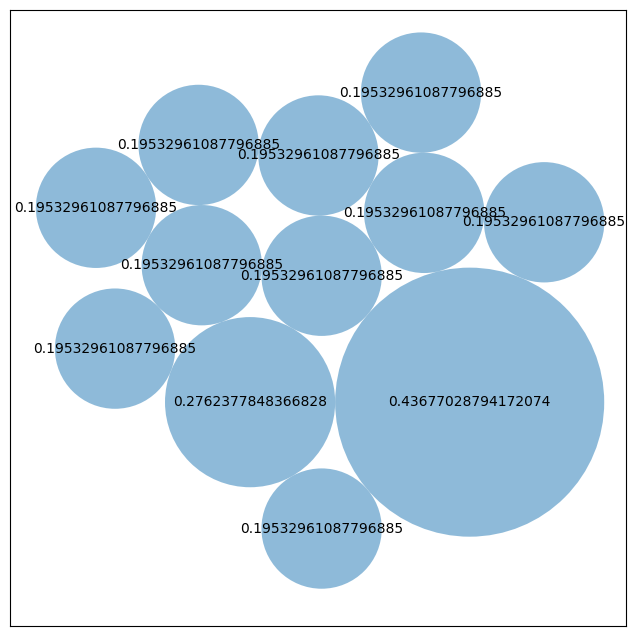

In [79]:
import matplotlib.pyplot as plt
import circlify
from collections import Counter
import re

# Sample text
text = "This is a sample text with some words. Some words are repeated, like words, words, and words."

# Splitting the text into words and counting occurrences
words = re.findall(r'\w+', text.lower())
word_counts = Counter(words)

# Create a list of circle sizes based on word frequency
circles = circlify.circlify(
    [word_counts[word] for word in word_counts],
    show_enclosure=False
)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 8))

# Draw each circle
for circle in circles:
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5))
    plt.text(x, y, r, ha='center', va='center')

# Set the same scale for x and y axes
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal', 'box')

# Remove x and y axis markers
plt.xticks([])
plt.yticks([])

# Display the plot
plt.show()
